In [187]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

In [200]:
class HistogramEqualizer:
    def __init__(self, in_path, out_path):
        self.in_path = in_path
        self.out_path = out_path

    def reset_plot_config(self, title):
        fig = plt.figure(figsize=(10, 7))
        fig.add_subplot(1, 1, 1)
        plt.title(title)

    def load_image(self):
        self.img = Image.open(self.in_path).convert('L')
        self.reset_plot_config('Original Image')
        plt.imshow(self.img, cmap='gray')

    def convert_to_array(self):
        self.arr = np.asarray(self.img)
        self.pixel_no = len(self.arr) * len(self.arr[0])
        print('Pixel Number: ', self.pixel_no)
        print('original inage array: ', self.arr)
        self.reset_plot_config('Histogram Of Gray Level')
        plt.hist(self.arr)
        plt.show()

    def make_level_array(self):
        self.levels = np.zeros(256)
        for x in np.nditer(self.arr):
            self.levels[x] = self.levels[x] + 1
        print('gray level repetetion number: ',self.levels)

    def calculate_cumulative_levels(self):
        self.cumulative_levels = np.array([np.sum(self.levels[:x+1]) for x in range(len(self.levels))])
        print('cumulative gray level repetetion number: ', self.cumulative_levels)

    def operate_cumulative(self):
        self.s = (self.cumulative_levels / self.pixel_no) * 255
        print('final s array: ', self.s)

    def make_result_array(self):
        self.res_img = []
        for i in self.arr:
            temp = []
            for j in i:
                temp.append(int(self.s[j]))
            self.res_img.append(temp)
        print('result image array: ',self.res_img)

    def compare_two_image(self, img, text):
        fig = plt.figure(figsize=(10, 7))
        fig.add_subplot(2, 1, 1)
        plt.imshow(self.res_img, cmap='gray')
        plt.axis('off')
        plt.title("Histogram Equalized")
        fig.add_subplot(2, 1, 2)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(text)

    def save_result_image(self):
        Image.fromarray(np.array(self.res_img)).convert("L").save(self.out_path)

    def external_library(self):
        self.external_img = ImageOps.equalize(self.img, mask = None)
        # self.external_img.show()
        plt.imshow(self.external_img, cmap='gray')

    def his_eq(self):
        self.load_image()
        self.convert_to_array()
        self.make_level_array()
        self.calculate_cumulative_levels()
        self.operate_cumulative()
        self.make_result_array()
        self.save_result_image()
        self.compare_two_image(self.img, 'Original')
        self.external_library()
        self.compare_two_image(self.external_img, 'External library')

Pixel Number:  50286
original inage array:  [[ 55  55  56 ... 141 143 114]
 [ 57  55  52 ... 109 113  97]
 [ 50  50  50 ...  85  91  98]
 ...
 [218 197 195 ... 229 227 228]
 [246 194 165 ... 228 225 227]
 [189 149 162 ... 227 223 234]]


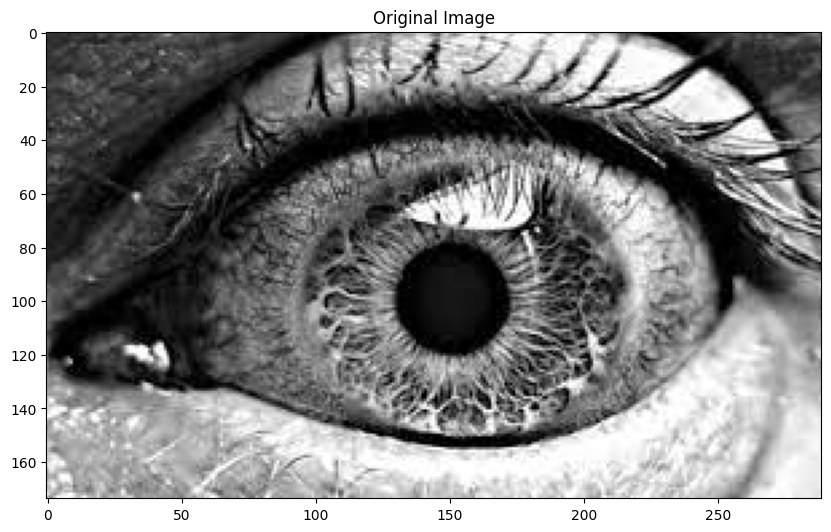

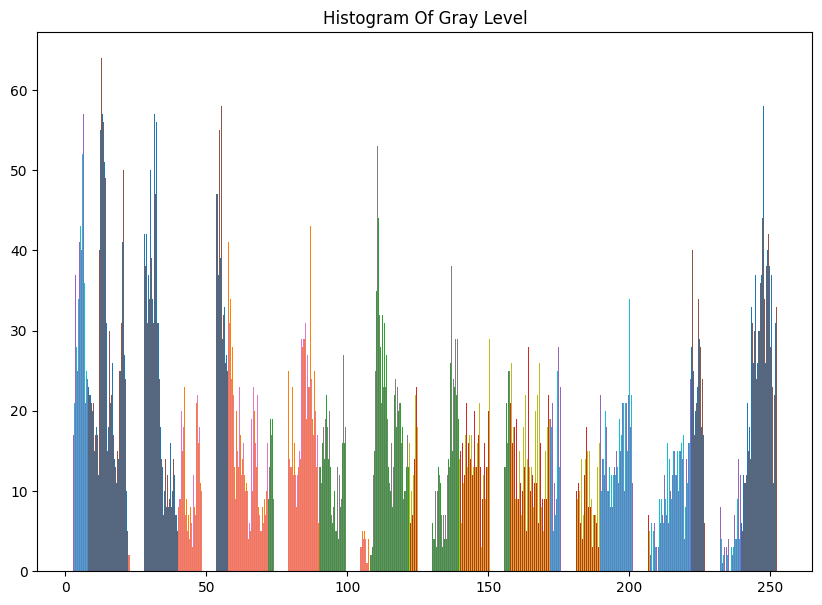

gray level repetetion number:  [1474.  376.  326.  356.  362.  331.  334.  256.  282.  262.  245.  244.
  220.  232.  215.  240.  228.  202.  247.  260.  230.  245.  252.  189.
  182.  197.  182.  204.  184.  192.  189.  197.  178.  219.  208.  204.
  210.  205.  200.  220.  221.  194.  256.  237.  229.  207.  213.  235.
  238.  231.  263.  234.  240.  210.  229.  230.  257.  226.  243.  253.
  217.  248.  204.  256.  231.  235.  238.  220.  217.  213.  227.  214.
  209.  219.  227.  202.  198.  226.  212.  197.  201.  211.  205.  187.
  199.  201.  235.  190.  211.  205.  219.  198.  194.  168.  183.  177.
  179.  179.  181.  190.  179.  188.  187.  203.  180.  163.  194.  203.
  189.  178.  179.  163.  168.  157.  180.  168.  177.  156.  173.  169.
  187.  177.  179.  172.  152.  167.  176.  162.  192.  154.  189.  173.
  174.  186.  157.  180.  182.  177.  169.  172.  165.  170.  162.  175.
  158.  176.  160.  168.  180.  156.  176.  166.  146.  132.  146.  151.
  171.  155.  157.  

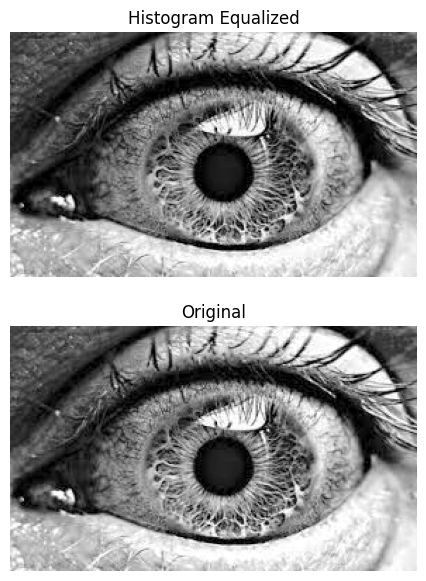

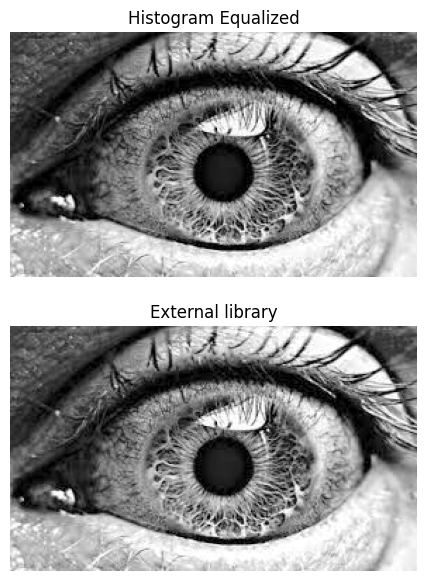

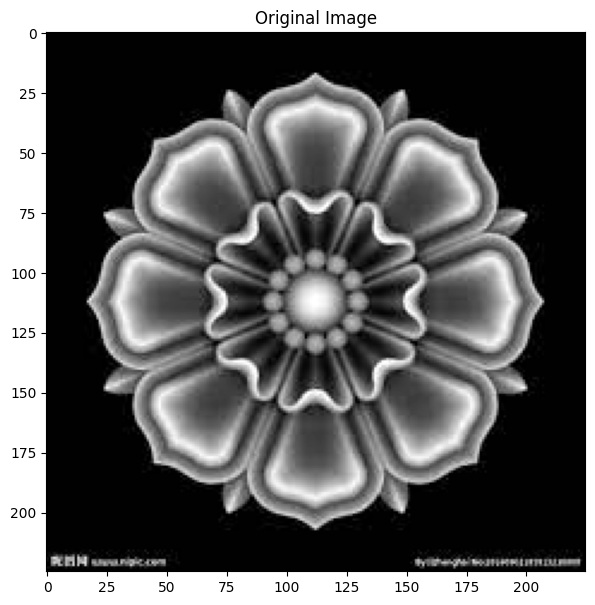

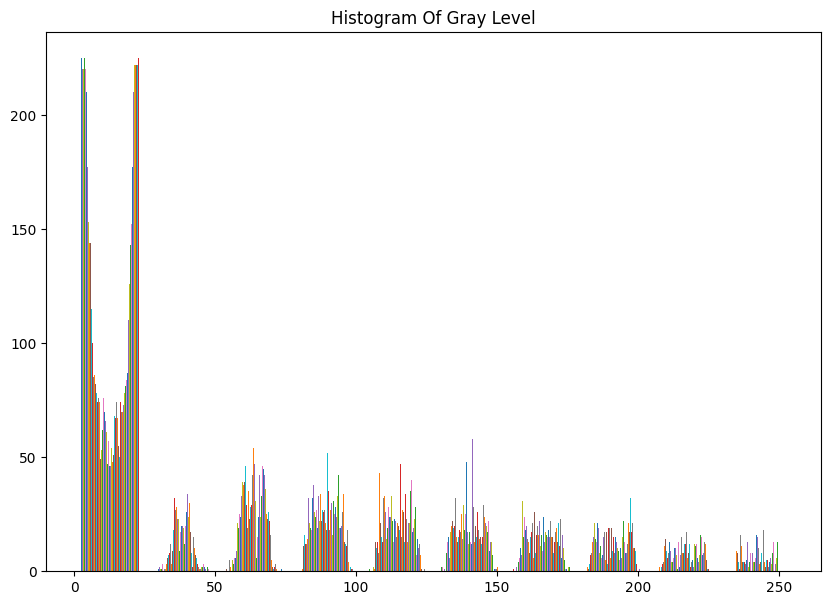

gray level repetetion number:  [1.3660e+03 2.1255e+04 1.7000e+02 1.6400e+02 1.6700e+02 1.6300e+02
 1.6000e+02 1.3400e+02 1.5000e+02 1.1600e+02 1.1200e+02 9.1000e+01
 9.1000e+01 9.7000e+01 8.0000e+01 9.3000e+01 8.1000e+01 5.8000e+01
 5.5000e+01 6.5000e+01 5.9000e+01 7.2000e+01 6.1000e+01 7.5000e+01
 6.6000e+01 5.8000e+01 6.5000e+01 5.9000e+01 6.6000e+01 7.1000e+01
 7.7000e+01 6.1000e+01 7.2000e+01 9.1000e+01 8.1000e+01 7.4000e+01
 8.7000e+01 8.3000e+01 7.9000e+01 8.3000e+01 8.4000e+01 9.5000e+01
 7.7000e+01 1.0700e+02 1.0100e+02 7.6000e+01 8.9000e+01 8.9000e+01
 9.2000e+01 1.0900e+02 9.7000e+01 9.3000e+01 9.2000e+01 9.8000e+01
 1.0200e+02 1.0800e+02 1.1700e+02 9.9000e+01 1.1800e+02 1.1300e+02
 1.2800e+02 1.7500e+02 2.2300e+02 2.3100e+02 2.2200e+02 2.2600e+02
 2.0200e+02 2.2000e+02 1.8500e+02 1.6500e+02 1.7600e+02 1.7000e+02
 1.6700e+02 1.6600e+02 1.4900e+02 1.6200e+02 1.7700e+02 1.8200e+02
 1.7400e+02 1.8500e+02 2.0300e+02 1.9300e+02 1.9300e+02 1.8600e+02
 1.8800e+02 1.7100e+02 1.8200e+

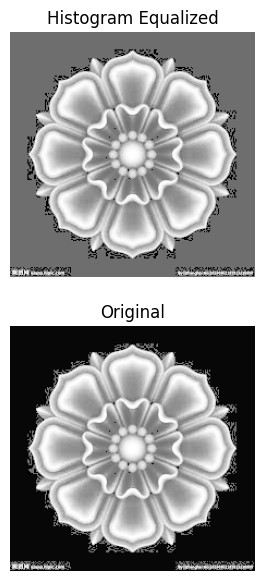

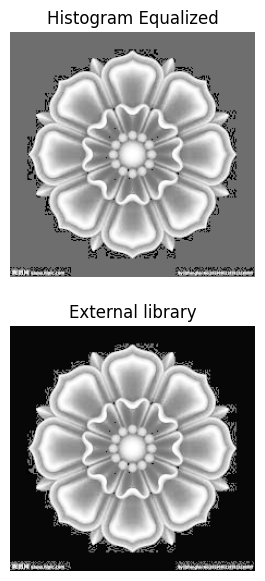

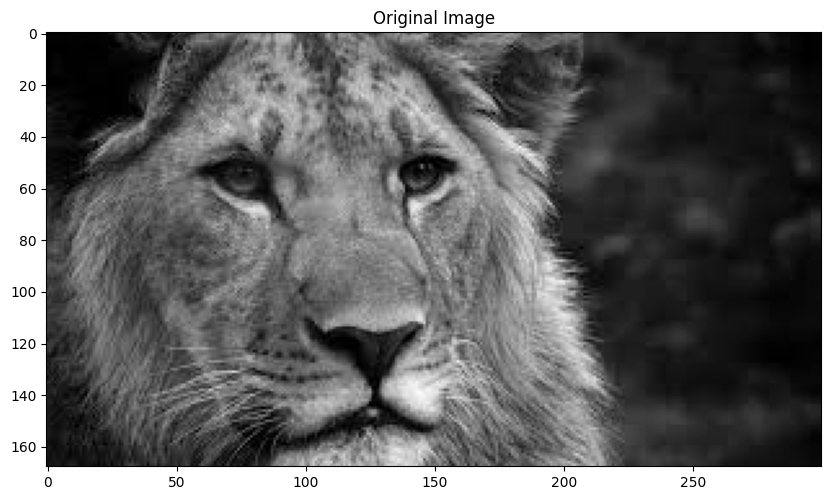

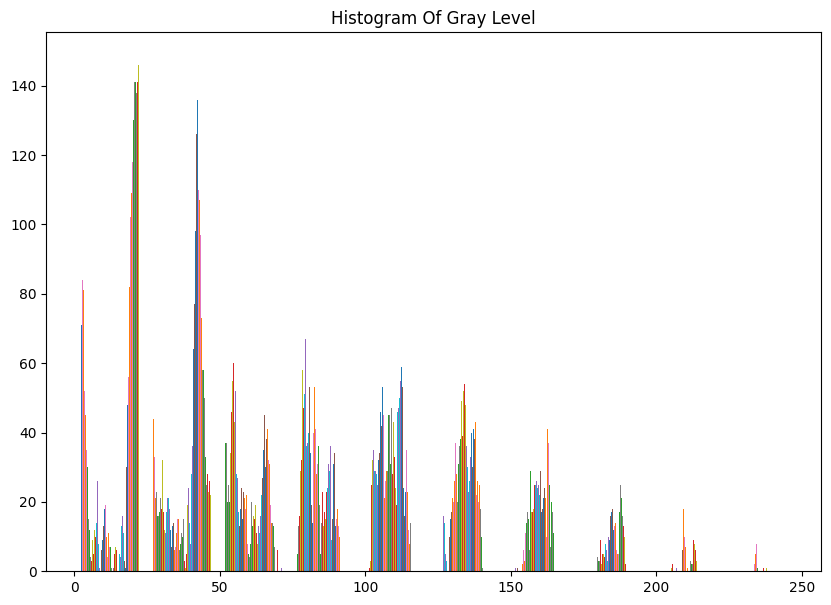

gray level repetetion number:  [327. 394. 292. 262. 231. 219. 275. 319. 321. 376. 330. 299. 287. 336.
 470. 537. 626. 623. 680. 587. 641. 592. 523. 526. 463. 447. 406. 404.
 405. 491. 415. 395. 402. 424. 436. 488. 495. 383. 363. 363. 336. 357.
 321. 348. 365. 306. 285. 324. 272. 295. 285. 244. 249. 253. 270. 243.
 291. 246. 253. 253. 266. 244. 244. 265. 239. 243. 249. 236. 245. 238.
 205. 237. 258. 227. 233. 246. 231. 248. 227. 237. 244. 255. 249. 266.
 255. 278. 268. 234. 229. 282. 261. 289. 272. 275. 274. 274. 297. 262.
 286. 273. 270. 260. 249. 280. 296. 299. 286. 277. 301. 315. 274. 272.
 299. 282. 299. 297. 257. 276. 285. 261. 276. 259. 268. 264. 253. 253.
 273. 232. 245. 273. 252. 264. 264. 224. 256. 209. 230. 227. 195. 193.
 212. 203. 224. 201. 205. 156. 216. 187. 195. 184. 176. 183. 166. 163.
 170. 179. 163. 153. 158. 138. 137. 125. 136. 120. 122. 113. 122. 121.
 108. 112.  95.  82.  96.  90.  86. 100.  86.  77.  68.  64.  60.  62.
  66.  46.  52.  63.  50.  41.  50.  44.  49. 

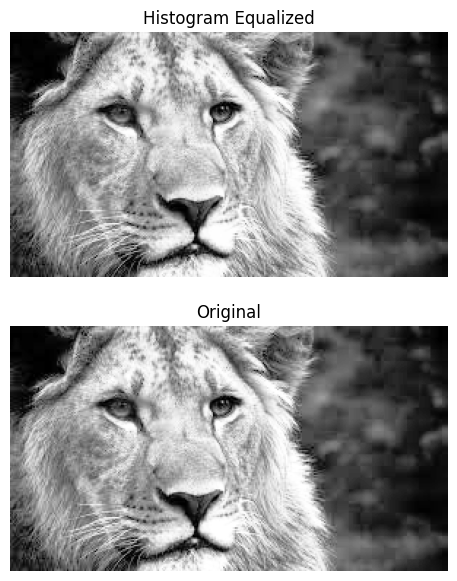

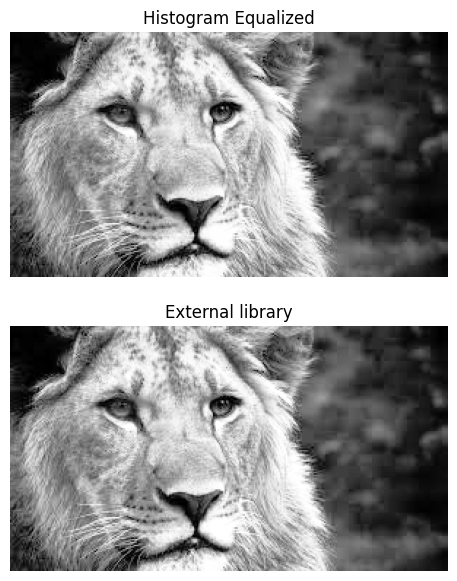

In [201]:
for i in range(1,4):
    in_path = 'image' + str(i) + '.png'
    out_path = 'image' + str(i) + '-hiseq.png'
    he = HistogramEqualizer(in_path, out_path)
    he.his_eq()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Non modular Code From Here#

In [ ]:
# img = Image.open('image1.png').convert('L')
plt.imshow(img, cmap='gray')

Showing histogram plot of the image

In [ ]:
# # arr = np.asarray(img)
# pixel_no = len(arr) * len(arr[0])
# print('Pixel Number: ', pixel_no)
# print('arr: ', arr)
# plt.hist(arr)
# plt.show()

calculating number of repetition of each gray level

In [ ]:
# # levels = np.zeros(256)
# for x in np.nditer(arr):
#     levels[x] = levels[x] + 1
# print(levels)

In [ ]:
# # cumulative_levels = np.array([np.sum(levels[:x+1]) for x in range(len(levels))])
# print(cumulative_levels)

In [189]:
# s = (cumulative_levels / pixel_no) * 255
# print(s)

In [190]:
# # res_img = []
# for i in arr:
#     temp = []
#     for j in i:
#         temp.append(int(s[j]))
#     res_img.append(temp)
# print(res_img)

In [191]:
# # fig = plt.figure(figsize=(10, 7))
# # Adds a subplot at the 1st position
# fig.add_subplot(2, 1, 1)
#
# # showing image
# plt.imshow(res_img, cmap='gray')
# plt.axis('off')
# plt.title("Histogram Equalized")
#
# # Adds a subplot at the 2nd position
# fig.add_subplot(2, 1, 2)
# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.title("Original")

In [192]:
# Image.fromarray(np.array(res_img)).convert("L").save('image1-hiseq.png')

In [193]:
# # external_img = ImageOps.equalize(img, mask = None)
# external_img.show()
# plt.imshow(external_img, cmap='gray')